In [1]:
import pandas as pd 
import numpy as np 
import sklearn as skl 
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import completeness_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time
import warnings
import os
import seaborn as sns # for ploting
from sklearn.metrics import fbeta_score, precision_score, recall_score, confusion_matrix,f1_score
import itertools
import pickle
import matplotlib
from matplotlib import pyplot as plt,style
from multiprocessing import Pool
from scipy.stats import multivariate_normal

In [2]:
style.use('ggplot')
np.random.seed(42) 

def plot_confusion_matrix(cm, classes,
                          recall,precision,f2,f1,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.text(0,2.3, f" Recall:{recall},\n Precision:{precision},\n F2 Score:{f2},\n F1 Score:{f1}", fontsize=12)
    plt.show()

In [3]:
warnings.simplefilter("ignore", category=DeprecationWarning)

root_feature = '/Users/abhijit/Desktop/GIT_Projects/intl-iot/All_devices_csv/features/us'

num_pools=12

In [4]:
lfiles = []
lparas= []
ldnames = []
device_names = []
for csv_file in os.listdir(root_feature):
    if csv_file.endswith('.csv'):
        print(csv_file)
        device_name = csv_file.replace('csv','')
        device_names.append(device_name)
        train_data_file = '%s/%s' % (root_feature, csv_file)
        dname = csv_file[:-4]
        lfiles.append(train_data_file)
        ldnames.append(dname)
        lparas.append((train_data_file, dname))
p = Pool(num_pools)

dlink-mov.csv
echospot.csv
sengled-hub.csv
wink-hub2.csv
tplink-bulb.csv
washer.csv
lefun-cam-wired.csv
echoplus.csv
xiaomi-hub.csv
wansview-cam-wired.csv
amcrest-cam-wired.csv
ring-doorbell.csv
lightify-hub.csv
microseven-camera.csv
bulb1.csv
fridge.csv
xiaomi-ricecooker.csv
google-home-mini.csv
firetv.csv
blink-camera.csv
sousvide.csv
ikettle.csv
t-wemo-plug.csv
xiaomi-strip.csv
samsungtv-wired.csv
roku-tv.csv
tplink-plug.csv
appletv.csv
echodot.csv
magichome-strip.csv
brewer.csv
nest-tstat.csv
zmodo-doorbell.csv
smartthings-hub.csv
lgtv-wired.csv
microwave.csv
dryer.csv
blink-security-hub.csv
cloudcam.csv
invoke.csv
yi-camera.csv
xiaomi-cleaner.csv
philips-bulb.csv
t-philips-hub.csv
insteon-hub.csv
luohe-spycam.csv


In [5]:
lparas[2][1]

'sengled-hub'

In [6]:
lparas[2][0]

'/Users/abhijit/Desktop/GIT_Projects/intl-iot/All_devices_csv/features/us/sengled-hub.csv'

Loading Normal data from --> dlink-mov
Loading Anomaly data from --> echospot
Train shape:  (48, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (13, 28)
Proportion os anomaly in validation set: 0.31

Test shape:,  (5, 28)
Proportion os anomaly in test set: 0.40

-69.95384368991866
-750.3058877081463
0.8695652173913042 0


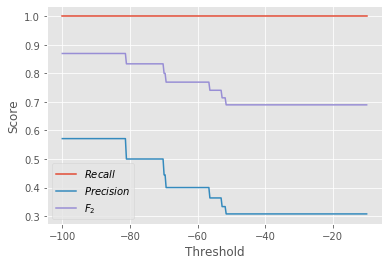

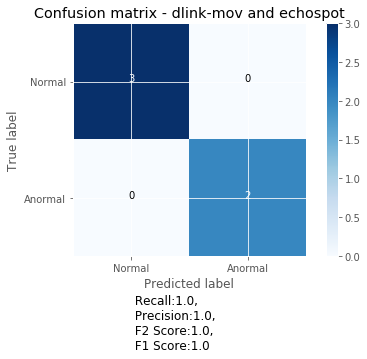

Loading Normal data from --> echospot
Loading Anomaly data from --> sengled-hub
Train shape:  (1928, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (541, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (182, 28)
Proportion os anomaly in test set: 0.34

-88.07860214434211
-95.99084796382716
0.8079268292682927 32


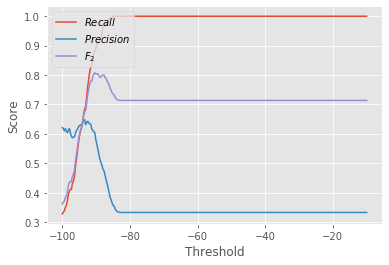

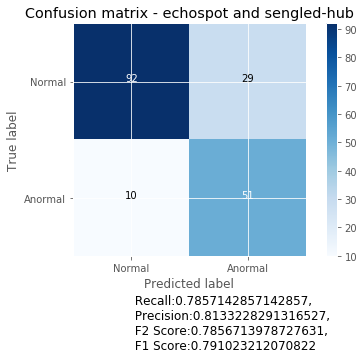

Loading Normal data from --> sengled-hub
Loading Anomaly data from --> wink-hub2
Train shape:  (3256, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (915, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (306, 28)
Proportion os anomaly in test set: 0.33

-69.89554713043108
-93.84344086949697
0.8296089385474862 98


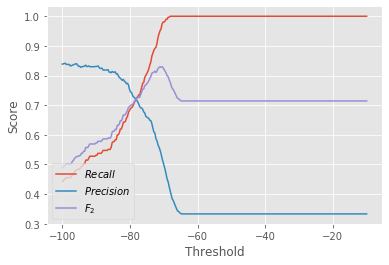

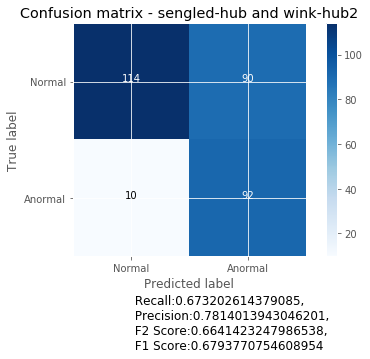

Loading Normal data from --> wink-hub2
Loading Anomaly data from --> tplink-bulb
Train shape:  (3304, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (928, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (311, 28)
Proportion os anomaly in test set: 0.33

-71.85213721329048
-151.13922063778463
0.967948717948718 1


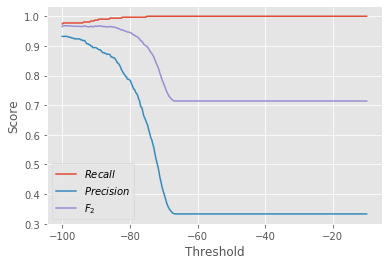

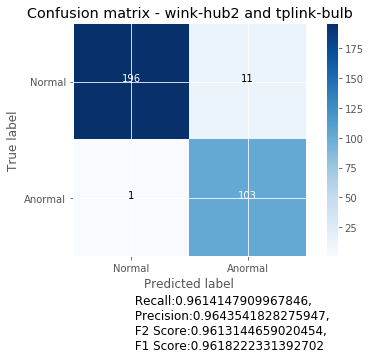

Loading Normal data from --> tplink-bulb
Loading Anomaly data from --> washer
Train shape:  (3600, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (922, 28)
Proportion os anomaly in validation set: 0.27

Test shape:,  (308, 28)
Proportion os anomaly in test set: 0.27

-65.4449908912147
-258.22639731607376
0.9793814432989691 0


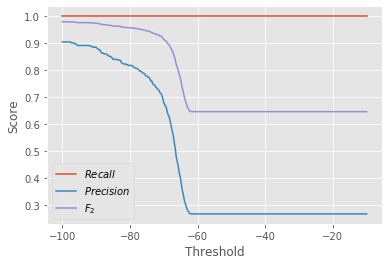

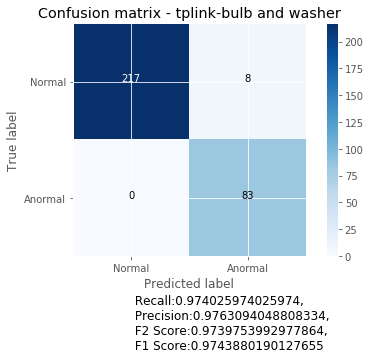

Loading Normal data from --> washer
Loading Anomaly data from --> lefun-cam-wired
Train shape:  (264, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (73, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (26, 28)
Proportion os anomaly in test set: 0.35

-56.26085286690477
-16874.27438685161
0.9917355371900827 0


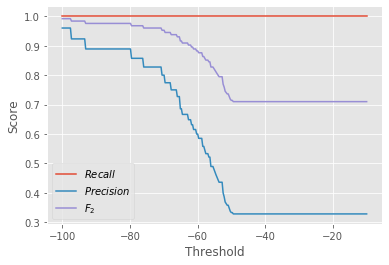

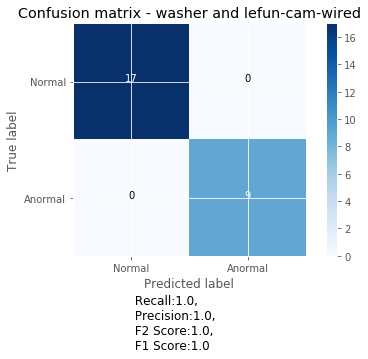

Loading Normal data from --> lefun-cam-wired
Loading Anomaly data from --> echoplus
Train shape:  (1656, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (465, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (156, 28)
Proportion os anomaly in test set: 0.33

-79.61429015213125
-402.09545884439984
0.9748427672955976 0


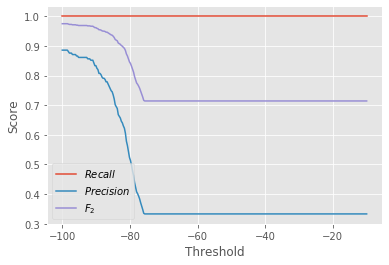

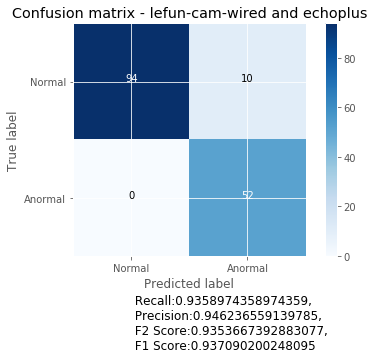

Loading Normal data from --> echoplus
Loading Anomaly data from --> xiaomi-hub
Train shape:  (4488, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (1261, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (422, 28)
Proportion os anomaly in test set: 0.33

-89.40116595678158
-208.56953033455892
0.9641873278236914 0


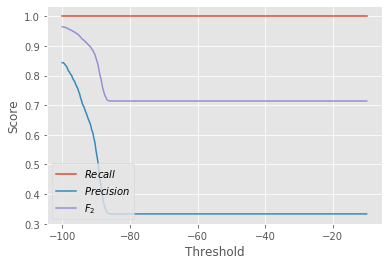

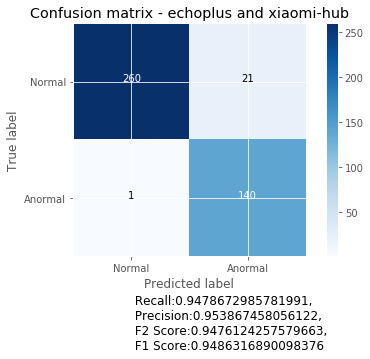

Loading Normal data from --> xiaomi-hub
Loading Anomaly data from --> wansview-cam-wired
Train shape:  (1344, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (378, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (126, 28)
Proportion os anomaly in test set: 0.33

-69.25805943267294
-144126.84932044207
0.989010989010989 0


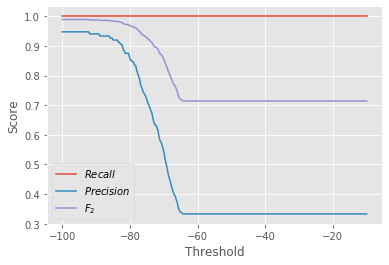

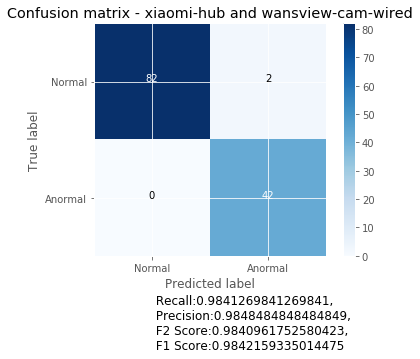

Loading Normal data from --> wansview-cam-wired
Loading Anomaly data from --> amcrest-cam-wired
Train shape:  (1576, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (442, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (149, 28)
Proportion os anomaly in test set: 0.34

-55.21103053451635
-3858.4195988898746
0.9865771812080536 0


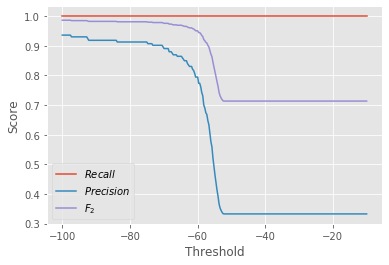

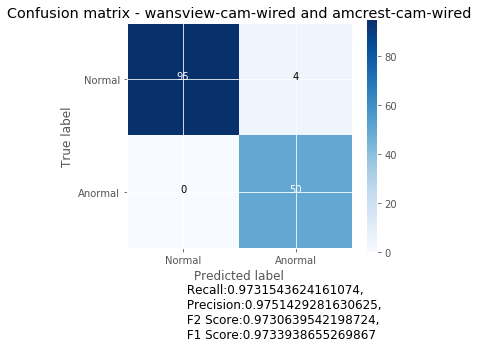

Loading Normal data from --> amcrest-cam-wired
Loading Anomaly data from --> ring-doorbell
Train shape:  (1688, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (474, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (159, 28)
Proportion os anomaly in test set: 0.33

-65.41940122356414
-817491.9088399075
0.983810709838107 0


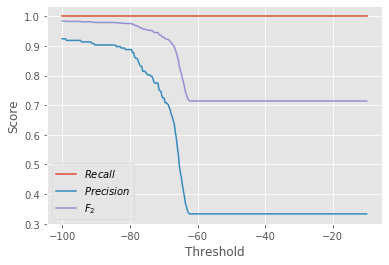

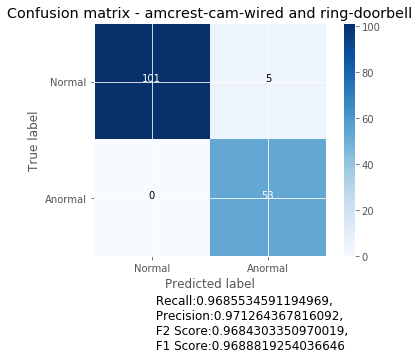

Loading Normal data from --> ring-doorbell
Loading Anomaly data from --> lightify-hub
Train shape:  (1336, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (375, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (126, 28)
Proportion os anomaly in test set: 0.33

-83.75151096602069
-464.75154787840694
0.9827044025157234 0


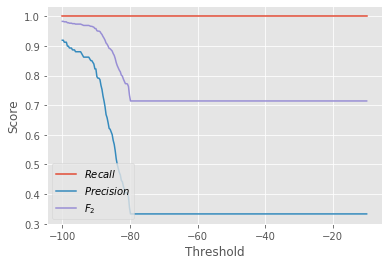

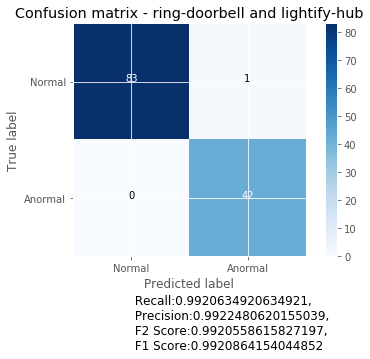

Loading Normal data from --> lightify-hub
Loading Anomaly data from --> microseven-camera
Train shape:  (1984, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (558, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (186, 28)
Proportion os anomaly in test set: 0.33

-62.435211944552435
-446393.351130652
0.9957173447537475 0


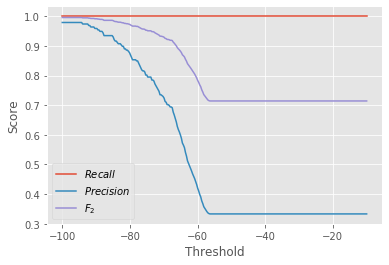

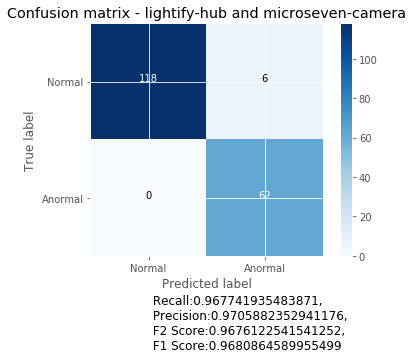

Loading Normal data from --> microseven-camera
Loading Anomaly data from --> bulb1
Train shape:  (296, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (82, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (29, 28)
Proportion os anomaly in test set: 0.34

-65.13733899219224
-12287.531444116928
0.9642857142857143 0


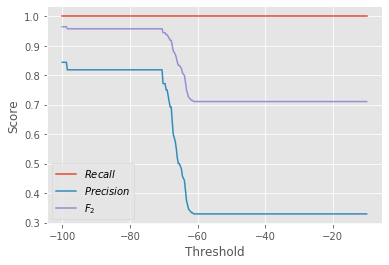

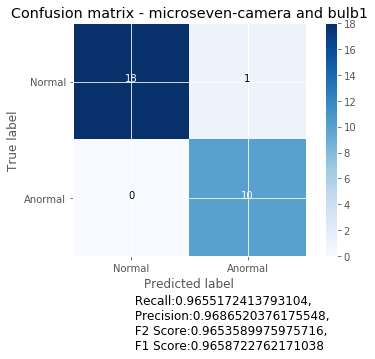

Loading Normal data from --> bulb1
Loading Anomaly data from --> fridge
Train shape:  (3848, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (1081, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (362, 28)
Proportion os anomaly in test set: 0.33

-74.14862946079016
-7577.725692833983
0.8773730118009235 68


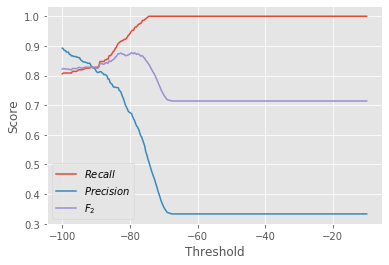

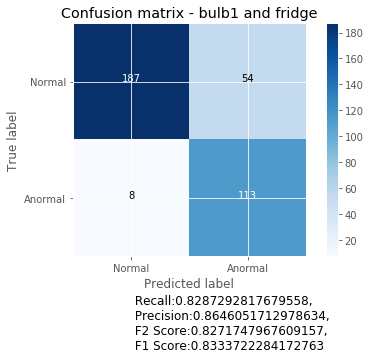

Loading Normal data from --> fridge
Loading Anomaly data from --> xiaomi-ricecooker
Train shape:  (2304, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (552, 28)
Proportion os anomaly in validation set: 0.22

Test shape:,  (184, 28)
Proportion os anomaly in test set: 0.22

-91.47034619792943
-178.52980098839348
0.8676470588235293 8


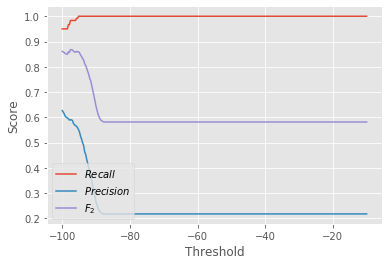

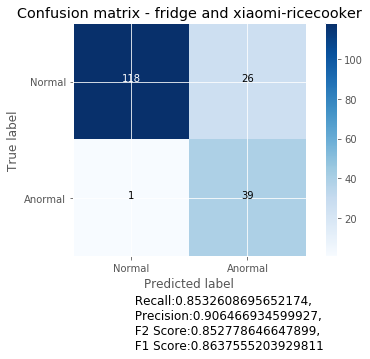

Loading Normal data from --> xiaomi-ricecooker
Loading Anomaly data from --> google-home-mini
Train shape:  (128, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (36, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (12, 28)
Proportion os anomaly in test set: 0.33

-67.30546418569998
-7193.625317425813
0.9836065573770493 0


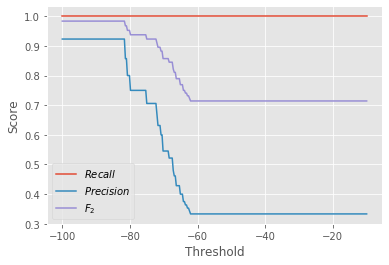

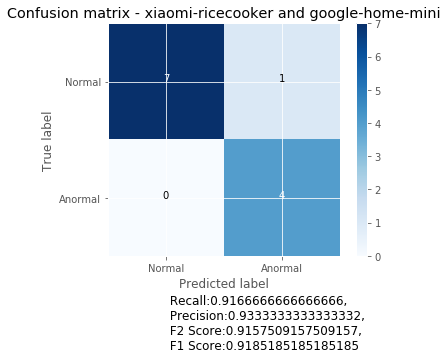

Loading Normal data from --> google-home-mini
Loading Anomaly data from --> firetv
Train shape:  (664, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (186, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (63, 28)
Proportion os anomaly in test set: 0.33

-61.77993664745891
-1837.088499100713
0.9810126582278481 0


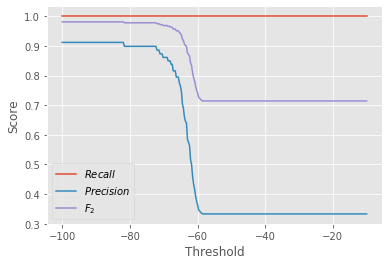

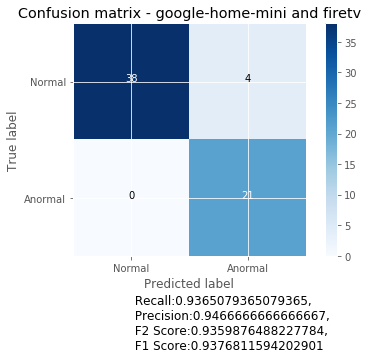

Loading Normal data from --> firetv
Loading Anomaly data from --> blink-camera
Train shape:  (376, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (105, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (36, 28)
Proportion os anomaly in test set: 0.33

-103.04795618295017
-120.07529982272717
0.7608695652173914 0


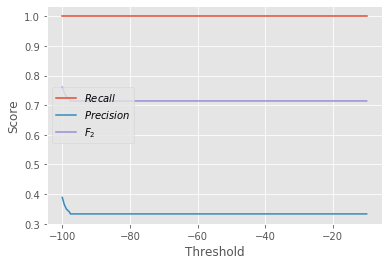

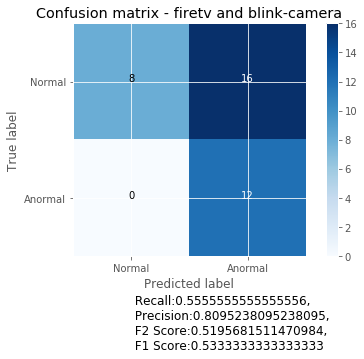

Loading Normal data from --> blink-camera
Loading Anomaly data from --> sousvide
Train shape:  (1784, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (341, 28)
Proportion os anomaly in validation set: 0.02

Test shape:,  (115, 28)
Proportion os anomaly in test set: 0.03

-77.02223891803649
-164.81361568632326
0.8536585365853658 0


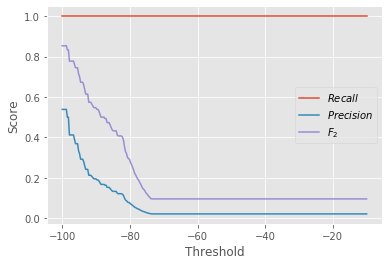

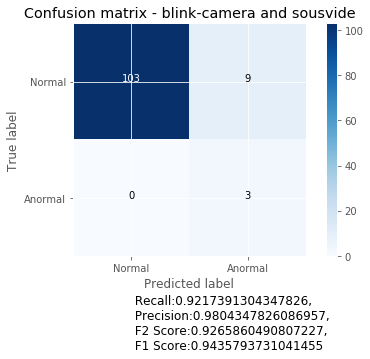

Loading Normal data from --> sousvide
Loading Anomaly data from --> ikettle
Train shape:  (8, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (1, 28)
Proportion os anomaly in validation set: 0.00

Test shape:,  (2, 28)
Proportion os anomaly in test set: 0.50

-31.87843008746398
nan
Error Calculating Outputs for sousvide and ikettle
Loading Normal data from --> ikettle
Loading Anomaly data from --> t-wemo-plug
Train shape:  (2168, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (609, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (204, 28)
Proportion os anomaly in test set: 0.33

-71.66849725150769
-2196.9275421999337


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.9844810863239574 15


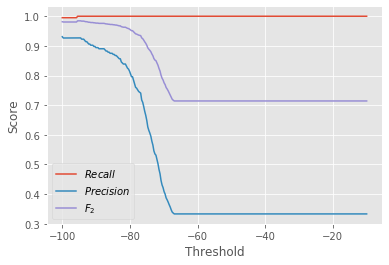

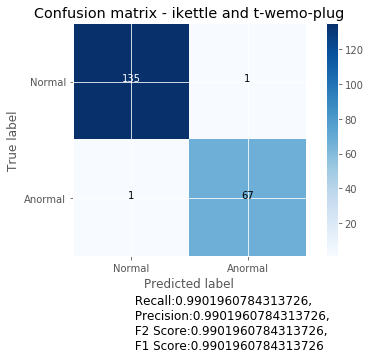

Loading Normal data from --> t-wemo-plug
Loading Anomaly data from --> xiaomi-strip
Train shape:  (1928, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (541, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (182, 28)
Proportion os anomaly in test set: 0.34

-61.71756033230981
-4922.960475597314
0.9922822491730982 0


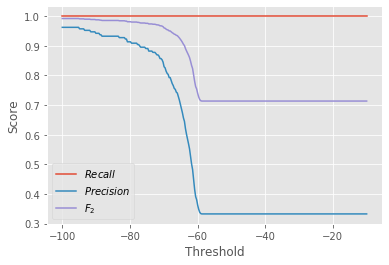

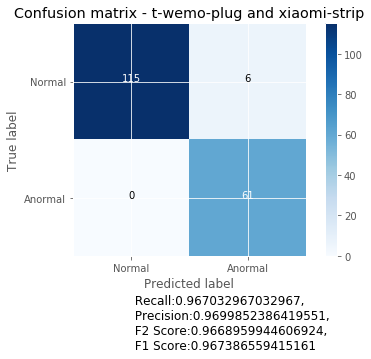

Loading Normal data from --> xiaomi-strip
Loading Anomaly data from --> samsungtv-wired
Train shape:  (2664, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (748, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (251, 28)
Proportion os anomaly in test set: 0.33

-66.89026625816552
-116769.5818157938
0.9800796812749003 0


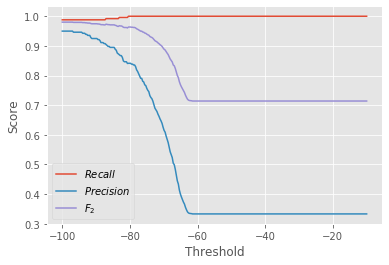

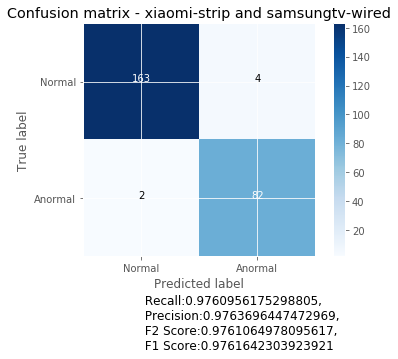

Loading Normal data from --> samsungtv-wired
Loading Anomaly data from --> roku-tv
Train shape:  (384, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (108, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (36, 28)
Proportion os anomaly in test set: 0.33

-75.4911312607191
-119.27278367839126
0.9523809523809523 0


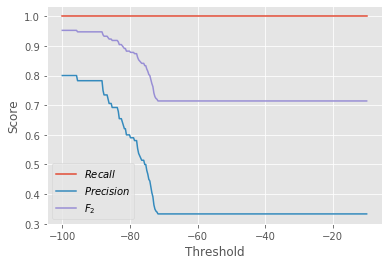

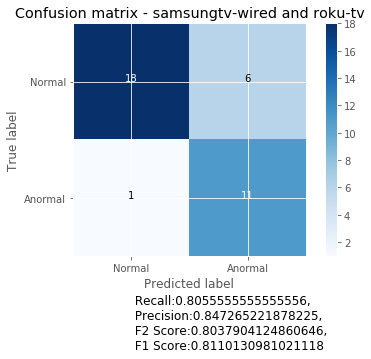

Loading Normal data from --> roku-tv
Loading Anomaly data from --> tplink-plug
Train shape:  (368, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (103, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (35, 28)
Proportion os anomaly in test set: 0.34

-60.9798308943496
-118.3211191632171
0.9239130434782609 99


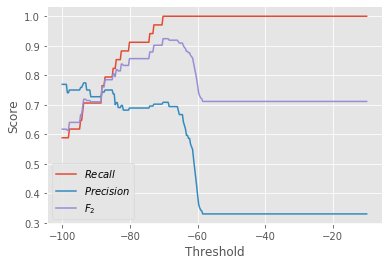

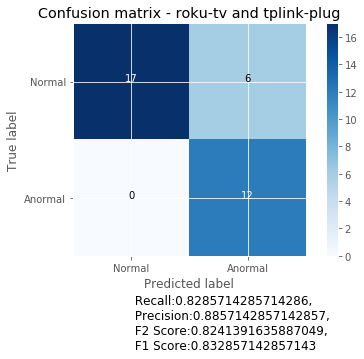

Loading Normal data from --> tplink-plug
Loading Anomaly data from --> appletv
Train shape:  (1936, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (438, 28)
Proportion os anomaly in validation set: 0.17

Test shape:,  (146, 28)
Proportion os anomaly in test set: 0.17

-57.43944011944844
-101998.0697367065
0.9816753926701571 47


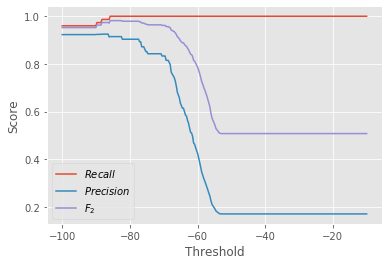

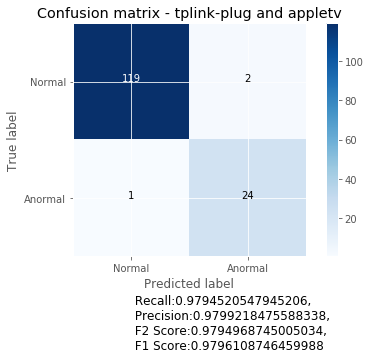

Loading Normal data from --> appletv
Loading Anomaly data from --> echodot
Train shape:  (80, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (22, 28)
Proportion os anomaly in validation set: 0.32

Test shape:,  (8, 28)
Proportion os anomaly in test set: 0.38

-84.03018994168417
-198.49563700311856
0.8974358974358974 0


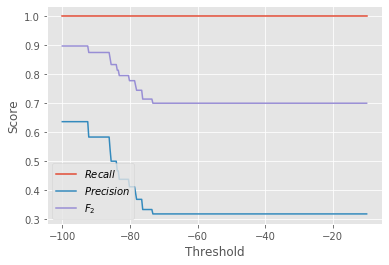

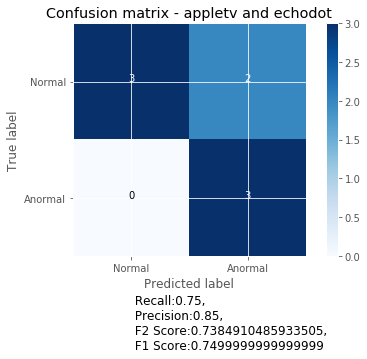

Loading Normal data from --> echodot
Loading Anomaly data from --> magichome-strip
Train shape:  (760, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (213, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (72, 28)
Proportion os anomaly in test set: 0.33

-80.5109768129546
-92.74810686879731
0.8919597989949749 56


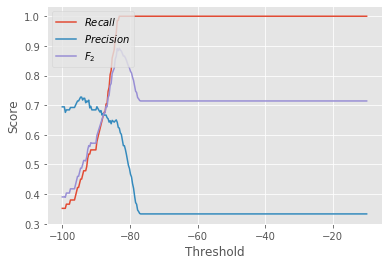

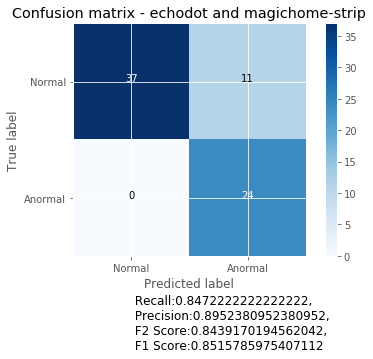

Loading Normal data from --> magichome-strip
Loading Anomaly data from --> brewer
Train shape:  (2352, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (643, 28)
Proportion os anomaly in validation set: 0.31

Test shape:,  (215, 28)
Proportion os anomaly in test set: 0.32

-53.25644608227233
-47276.03534069893
0.987292277614858 0


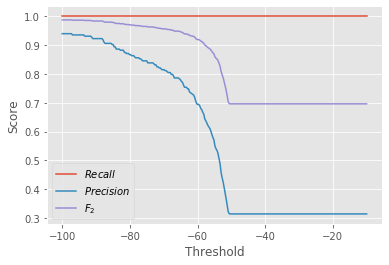

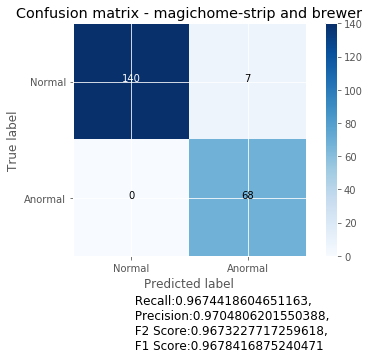

Loading Normal data from --> brewer
Loading Anomaly data from --> nest-tstat
Train shape:  (216, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (60, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (21, 28)
Proportion os anomaly in test set: 0.33

-72.54901820204175
-3788.49128351152
1.0 0


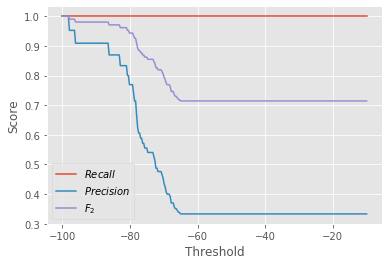

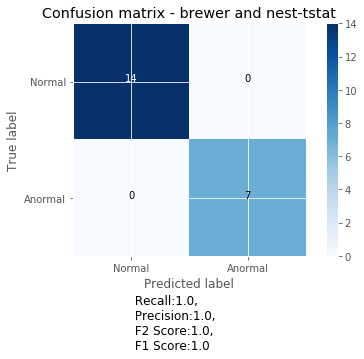

Loading Normal data from --> nest-tstat
Loading Anomaly data from --> zmodo-doorbell
Train shape:  (2192, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (616, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (206, 28)
Proportion os anomaly in test set: 0.33

-56.460878175967416
-3018.061982794158
0.9922555663117135 0


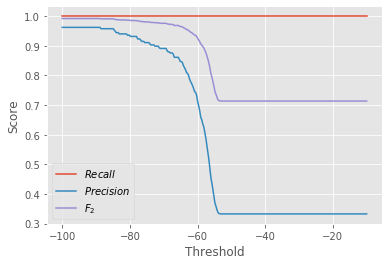

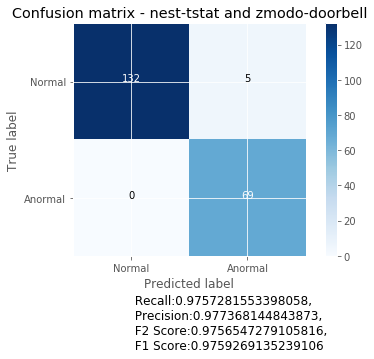

Loading Normal data from --> zmodo-doorbell
Loading Anomaly data from --> smartthings-hub
Train shape:  (1960, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (550, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (185, 28)
Proportion os anomaly in test set: 0.34

-62.50330490872903
-3676.141505462929
0.9775641025641026 0


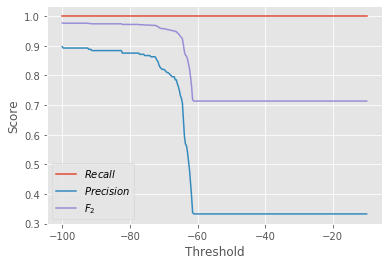

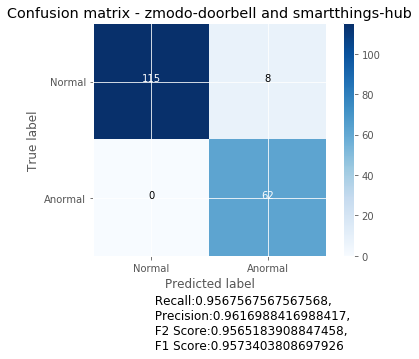

Loading Normal data from --> smartthings-hub
Loading Anomaly data from --> lgtv-wired
Train shape:  (6336, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (1533, 28)
Proportion os anomaly in validation set: 0.23

Test shape:,  (511, 28)
Proportion os anomaly in test set: 0.23

-70.54095938980413
-3839.248830186595
0.9756787330316741 0


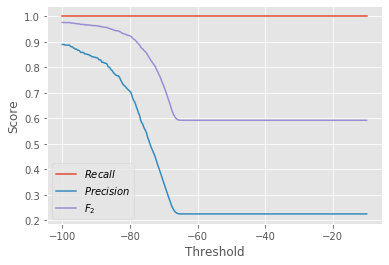

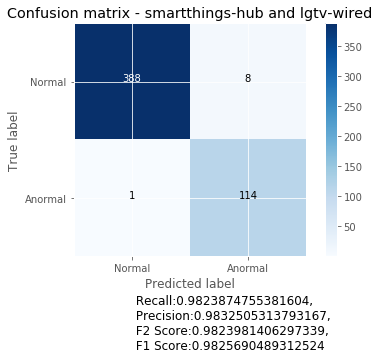

Loading Normal data from --> lgtv-wired
Loading Anomaly data from --> microwave
Train shape:  (368, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (103, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (35, 28)
Proportion os anomaly in test set: 0.34

-88.94574203076152
-161.60562033896537
0.8900523560209423 0


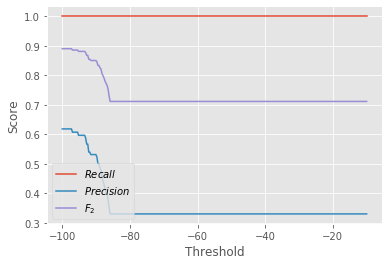

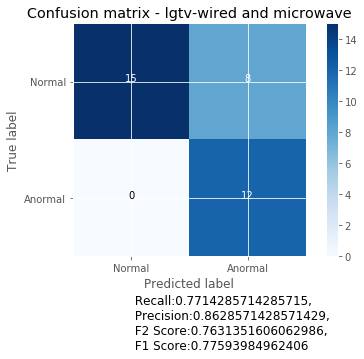

Loading Normal data from --> microwave
Loading Anomaly data from --> dryer
Train shape:  (192, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (54, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (18, 28)
Proportion os anomaly in test set: 0.33

-71.52199612521947
-1239.1212725017851
0.9782608695652175 0


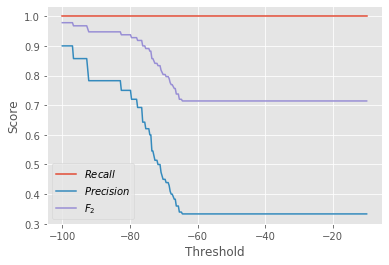

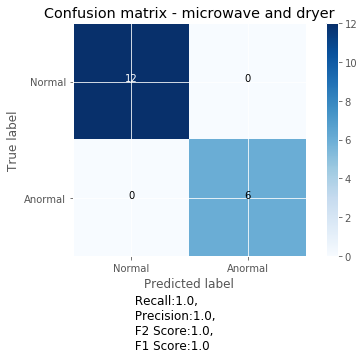

Loading Normal data from --> dryer
Loading Anomaly data from --> blink-security-hub
Train shape:  (264, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (73, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (26, 28)
Proportion os anomaly in test set: 0.35

-53.62756624881799
-15139.808677521669
1.0 0


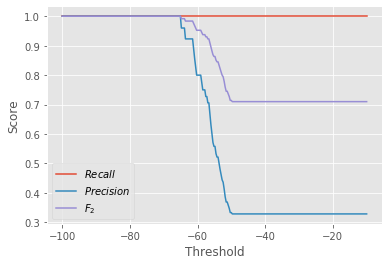

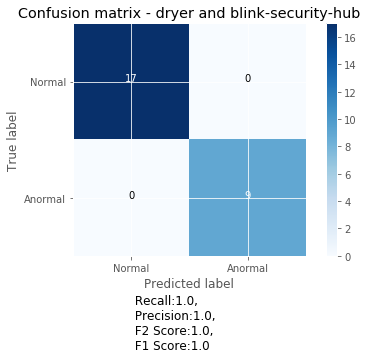

Loading Normal data from --> blink-security-hub
Loading Anomaly data from --> cloudcam
Train shape:  (1520, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (427, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (143, 28)
Proportion os anomaly in test set: 0.34

-60.56562059302785
-34770.273619265194
0.9957924263674613 0


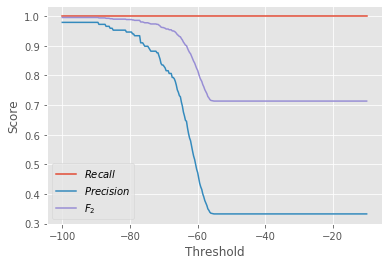

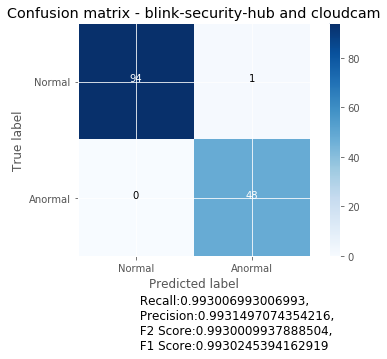

Loading Normal data from --> cloudcam
Loading Anomaly data from --> invoke
Train shape:  (1320, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (370, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (125, 28)
Proportion os anomaly in test set: 0.34

-67.97567513262162
-272.4771665422257
0.9761904761904762 0


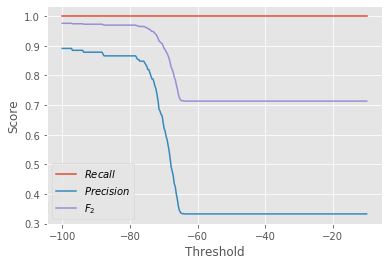

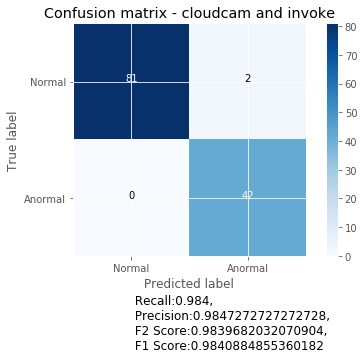

Loading Normal data from --> invoke
Loading Anomaly data from --> yi-camera
Train shape:  (664, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (186, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (63, 28)
Proportion os anomaly in test set: 0.33

-66.60463271820603
-228.97538343091205
0.9872611464968153 0


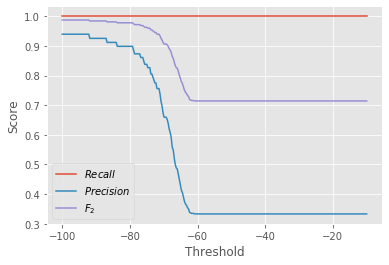

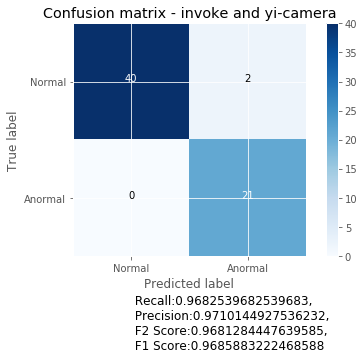

Loading Normal data from --> yi-camera
Loading Anomaly data from --> xiaomi-cleaner
Train shape:  (1992, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (553, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (185, 28)
Proportion os anomaly in test set: 0.32

-74.74655754652271
-19281.96715294605
0.9868421052631579 0


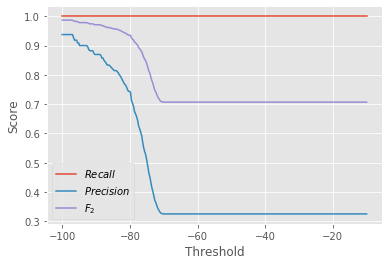

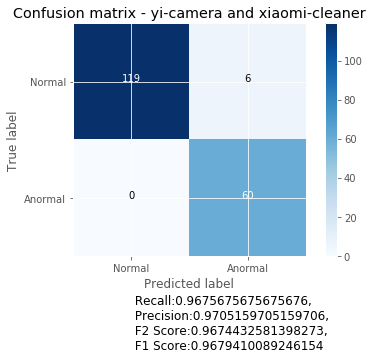

Loading Normal data from --> xiaomi-cleaner
Loading Anomaly data from --> philips-bulb
Train shape:  (192, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (54, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (18, 28)
Proportion os anomaly in test set: 0.33

-69.14149895782042
-76.47111923489626
0.7894736842105262 108


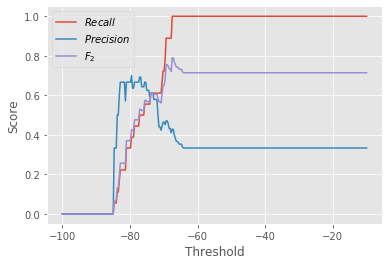

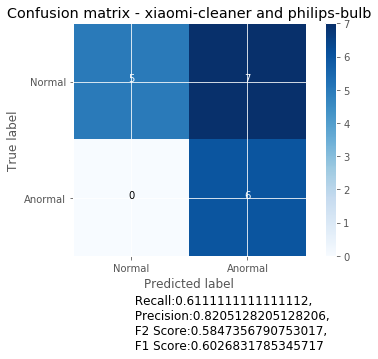

Loading Normal data from --> philips-bulb
Loading Anomaly data from --> t-philips-hub
Train shape:  (2296, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (645, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (216, 28)
Proportion os anomaly in test set: 0.33

-62.9287821796907
-10565.07123097378
0.9880514705882352 41


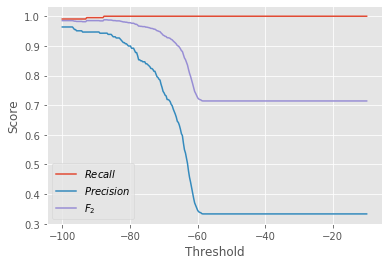

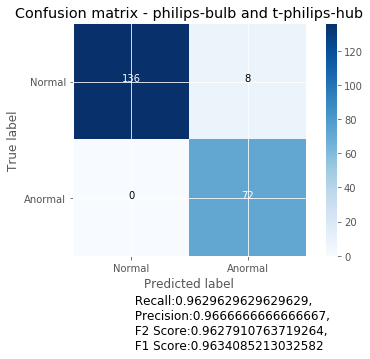

Loading Normal data from --> t-philips-hub
Loading Anomaly data from --> insteon-hub
Train shape:  (3984, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (1120, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (374, 28)
Proportion os anomaly in test set: 0.33

-81.7596660549833
-90.24732039066029
0.9028120374938332 48


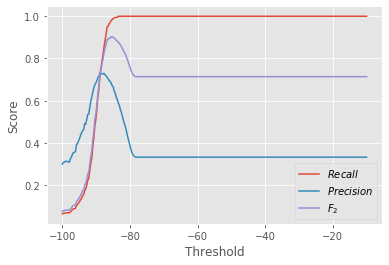

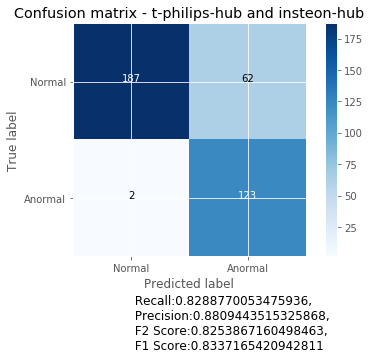

Loading Normal data from --> insteon-hub
Loading Anomaly data from --> luohe-spycam
Train shape:  (1824, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (513, 28)
Proportion os anomaly in validation set: 0.33

Test shape:,  (171, 28)
Proportion os anomaly in test set: 0.33

-42.19852119919997
-10219.889434804007
0.9907300115874854 0


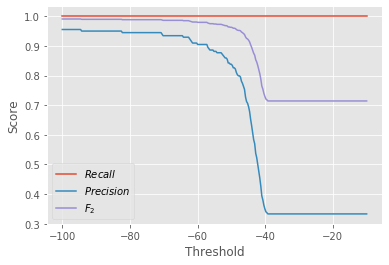

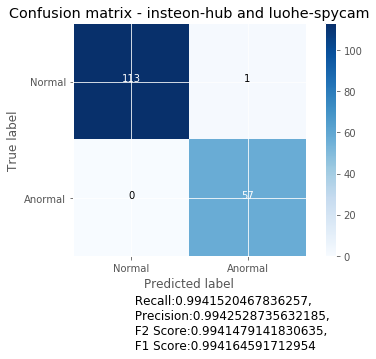

Loading Normal data from --> luohe-spycam
Loading Anomaly data from --> dlink-mov
Train shape:  (1872, 28)
Proportion os anomaly in training set: 0.00

Valid shape:  (396, 28)
Proportion os anomaly in validation set: 0.11

Test shape:,  (132, 28)
Proportion os anomaly in test set: 0.11

-76.04571720310412
-2980.2651223976836
0.9183673469387755 0


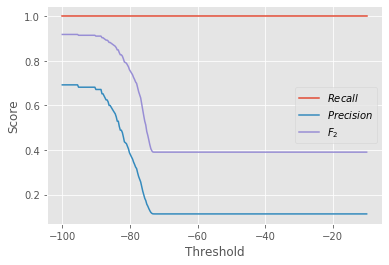

IndexError: list index out of range

In [7]:
recall_dict = {}
precision_dict= {}
f1_dict = {}
f2_dict = {}

for i,j in enumerate(lparas):
    # Data Loading
    print(f"Loading Normal data from --> {lparas[i][1]}")
    data = pd.read_csv(lparas[i][0])
    try:
        print(f"Loading Anomaly data from --> {lparas[i+1][1]}")
        anomaly_data = pd.read_csv(lparas[i+1][0])
    except IndexError:
        print(f"Loading Anomaly data from --> {lparas[0][1]}")
        anomaly_data = pd.read_csv(lparas[0][0])
    try:
        anomaly_data = anomaly_data.sample(round(data.shape[0]*0.10))
    except ValueError:
        anomaly_data = anomaly_data
    anomaly_data['state'] = 'anomaly'
    data_features = data.drop(['device'], axis=1).fillna(-1)

    # Data Processing
    anomaly_features = anomaly_data.drop(['device'], axis=1).fillna(-1)

    train, normal_test, _, _ = train_test_split(data_features, data_features, test_size=.2, random_state=42)

    normal_valid, normal_test, _, _ = train_test_split(normal_test, normal_test, test_size=.25, random_state=42)
    anormal_valid, anormal_test, _, _ = train_test_split(anomaly_features, anomaly_features, test_size=.25, random_state=42)

    train = train.reset_index(drop=True)
    valid = normal_valid.append(anormal_valid).sample(frac=1).reset_index(drop=True)
    test = normal_test.append(anormal_test).sample(frac=1).reset_index(drop=True)

    train['state'] = train['state'].apply(lambda x: 1 if x == 'anomaly' else 0)
    valid['state'] = valid['state'].apply(lambda x: 1 if x == 'anomaly' else 0)
    test['state'] = test['state'].apply(lambda x: 1 if x == 'anomaly' else 0)

    print('Train shape: ', train.shape)
    print('Proportion os anomaly in training set: %.2f\n' % train['state'].mean())
    print('Valid shape: ', valid.shape)
    print('Proportion os anomaly in validation set: %.2f\n' % valid['state'].mean())
    print('Test shape:, ', test.shape)
    print('Proportion os anomaly in test set: %.2f\n' % test['state'].mean())


    # Training the model
    mu = train.drop('state', axis=1).mean(axis=0).values
    sigma = train.drop('state', axis=1).cov().values
    model = multivariate_normal(cov=sigma, mean=mu, allow_singular=True)

    print(np.median(model.logpdf(valid[valid['state'] == 0].drop('state', axis=1).values))) 
    print(np.median(model.logpdf(valid[valid['state'] == 1].drop('state', axis=1).values)))


    # Validation and Testing
    tresholds = np.linspace(-100,-10, 300)
    scores = []
    try:
        for treshold in tresholds:
            y_hat = (model.logpdf(valid.drop('state', axis=1).values) < treshold).astype(int)
            scores.append([recall_score(y_pred=y_hat, y_true=valid['state'].values),
                         precision_score(y_pred=y_hat, y_true=valid['state'].values),
                         fbeta_score(y_pred=y_hat, y_true=valid['state'].values, beta=2)])

        scores = np.array(scores)
        print(scores[:, 2].max(), scores[:, 2].argmax())


        plt.plot(tresholds, scores[:, 0], label='$Recall$')
        plt.plot(tresholds, scores[:, 1], label='$Precision$')
        plt.plot(tresholds, scores[:, 2], label='$F_2$')
        plt.ylabel('Score')
        # plt.xticks(np.logspace(-10, -200, 3))
        plt.xlabel('Threshold')
        plt.legend(loc='best')
        plt.show()

        final_tresh = tresholds[scores[:, 2].argmax()]
        y_hat_test = (model.logpdf(test.drop('state', axis=1).values) < final_tresh).astype(int)


        recall = recall_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
        precision = precision_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
        f2 = fbeta_score(y_pred=y_hat_test, y_true=test['state'].values, beta=2,average='weighted')
        f1 = f1_score(y_pred=y_hat_test, y_true=test['state'].values,average='weighted')
        if i<=45:
            recall_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = recall
            precision_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = precision
            f1_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = f1
            f2_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = f2 
        else:
            recall_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = recall
            precision_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = precision
            f1_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = f1
            f2_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = f2
            
        cnf_matrix = confusion_matrix(test['state'].values, y_hat_test)
        plot_confusion_matrix(cnf_matrix, classes=['Normal','Anormal'],
                              recall=recall,precision=precision,f2 = f2,f1=f1, title=f'Confusion matrix - {lparas[i][1]} and {lparas[i+1][1]}')
    except:
        if i <= 45:
            print(f"Error Calculating Outputs for {lparas[i][1]} and {lparas[i+1][1]}")
            recall_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = 0
            precision_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = 0
            f1_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = 0
            f2_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = 0
            continue
        else:
            print(f"Error Calculating Outputs for {lparas[i][1]} and {lparas[0][1]}")
            recall_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = 0
            precision_dict[f'{lparas[i][1]}-{lparas[i+1][1]}'] = 0
            f1_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = 0
            f2_dict[f'{lparas[i][1]}-{lparas[0][1]}'] = 0
            continue

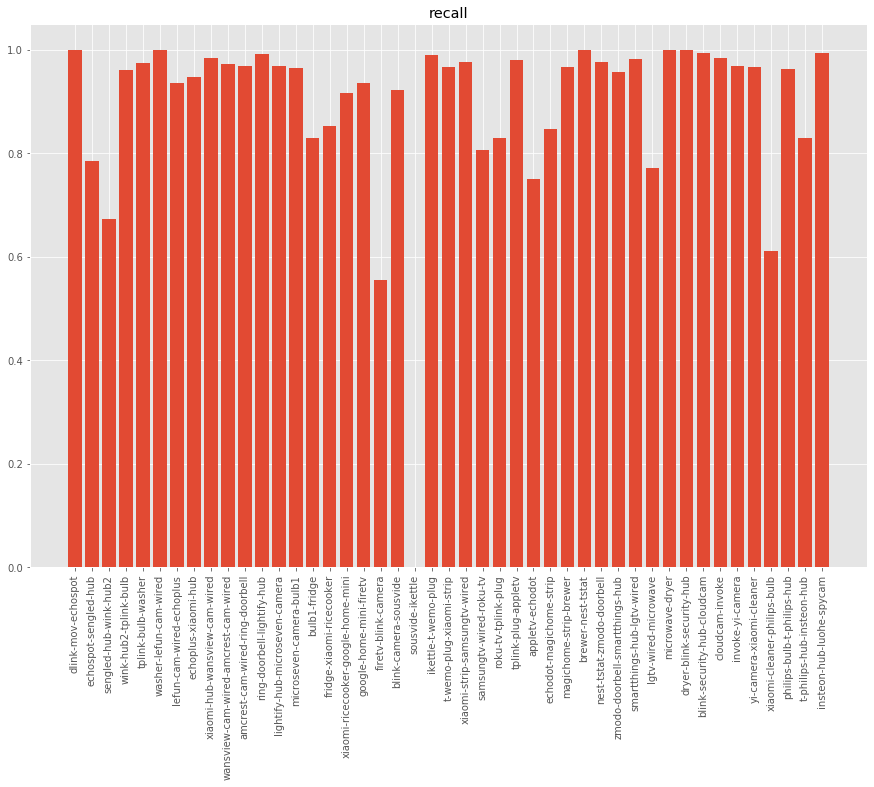

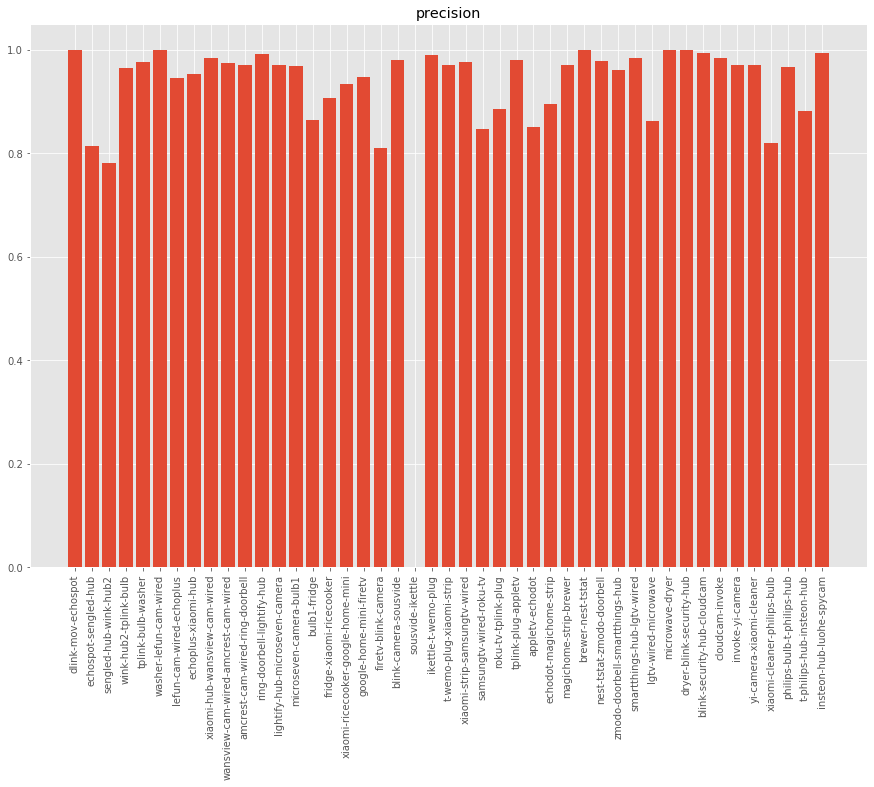

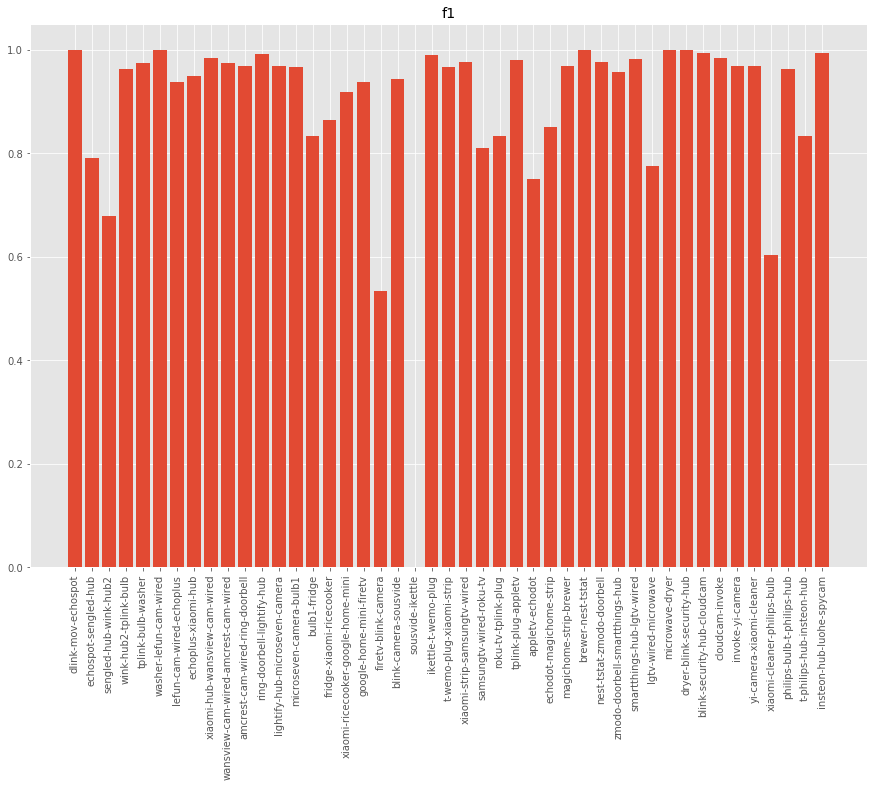

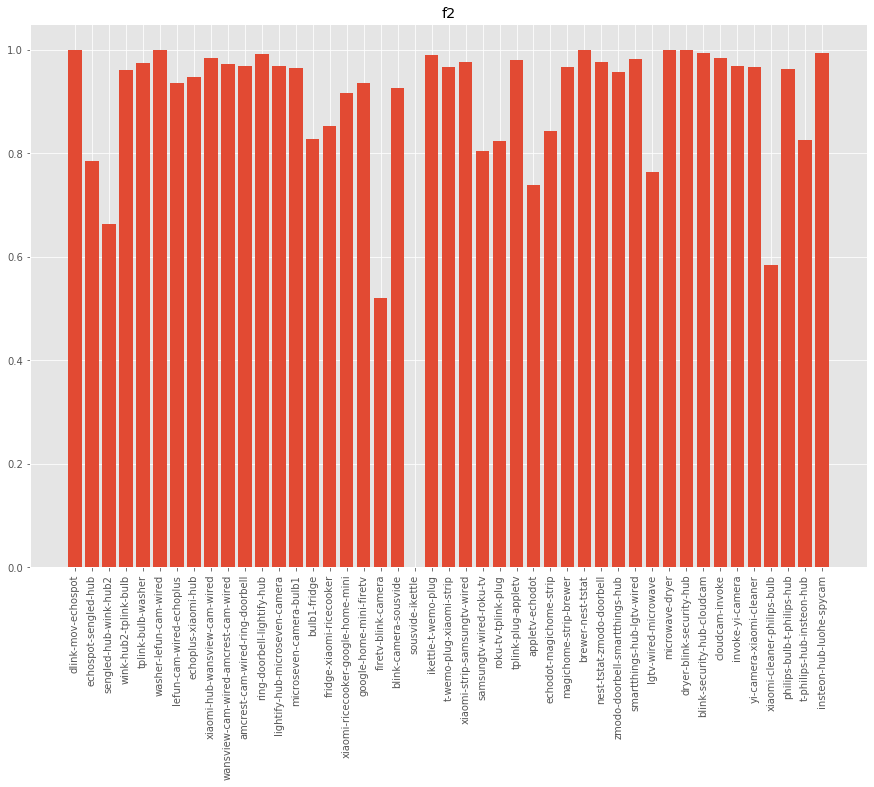

In [8]:
results = [recall_dict,precision_dict,f1_dict,f2_dict]
names = ['recall','precision','f1','f2']
for result,name in zip(results,names):
    f,ax = plt.subplots(figsize=(15,10))
    plt.bar(range(len(result)), list(result.values()), align='center')
    plt.xticks(range(len(result)), list(result.keys()),rotation = 90)
    plt.title(name)
    plt.show()

In [9]:
sum(recall_dict.values())/len(recall_dict.values())

0.894434215852874

In [10]:
sum(precision_dict.values())/len(precision_dict.values())

0.9215865886883903

In [11]:
sum(f1_dict.values())/len(f1_dict.values())

0.8955810908623172

In [12]:
sum(f2_dict.values())/len(f2_dict.values())

0.8920935801266852

In [13]:
combined_data = data_features.append(anomaly_features)
combined_data['state'] = combined_data['state'].apply(lambda x: 1 if x == 'anomaly' else 0)
columns_data = combined_data.columns
columns_data = columns_data.drop('state')

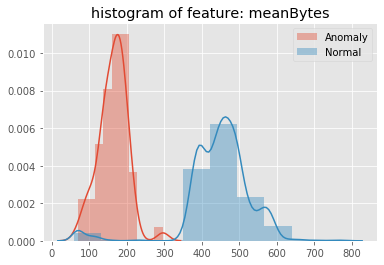

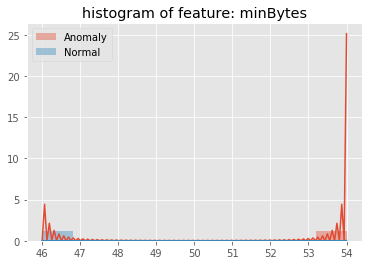

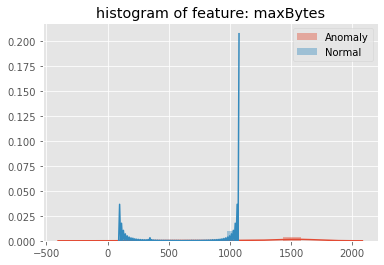

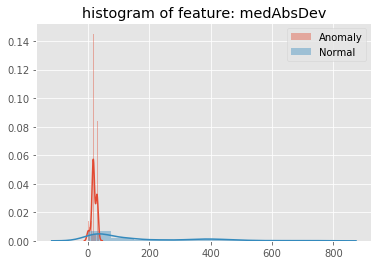

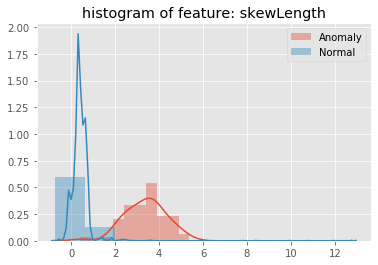

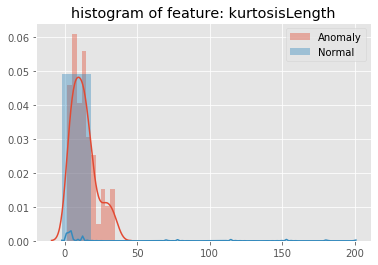

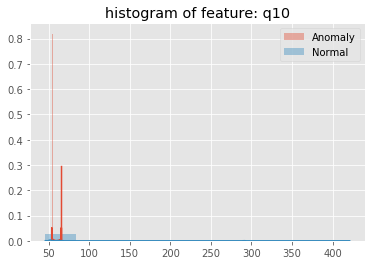

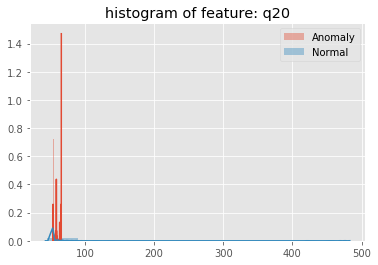

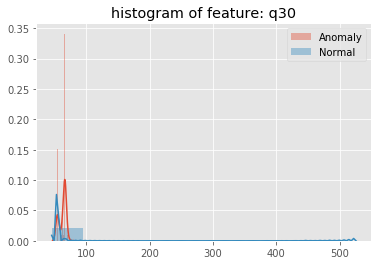

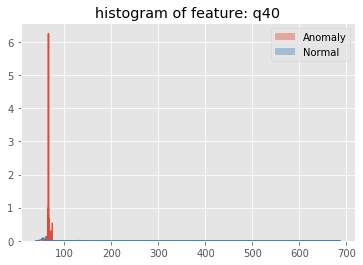

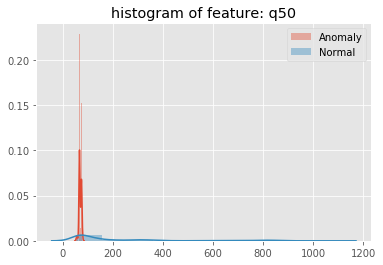

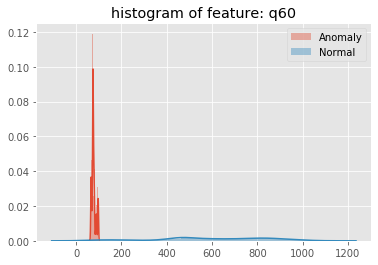

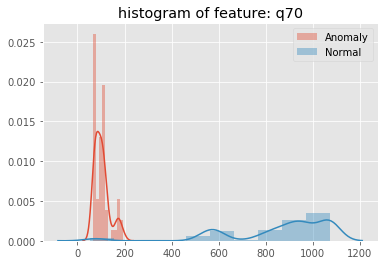

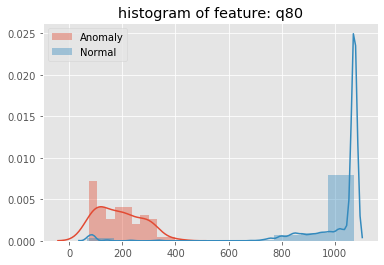

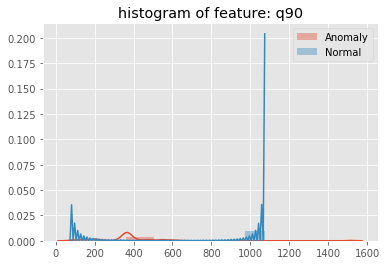

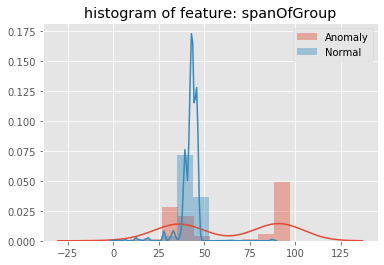

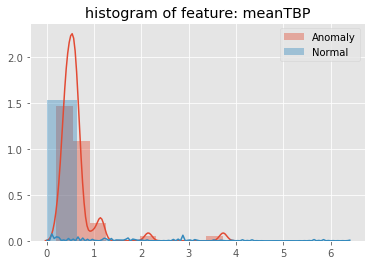

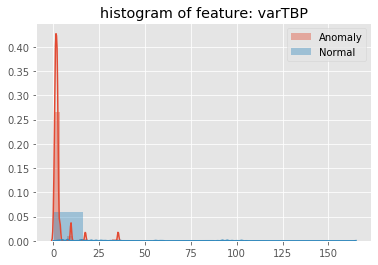

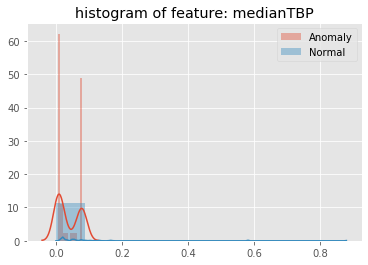

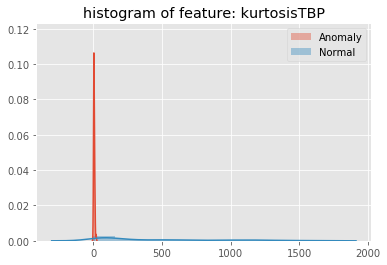

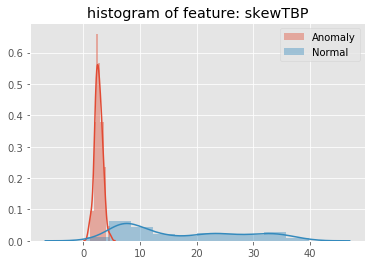

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


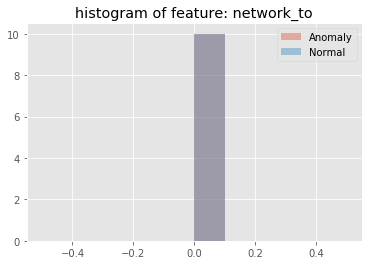

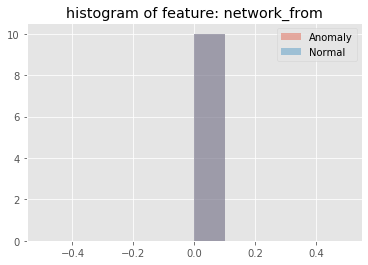

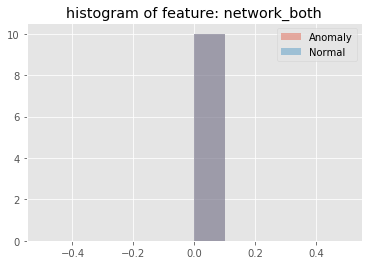

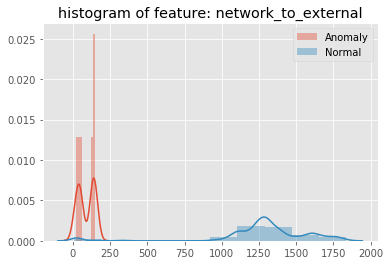

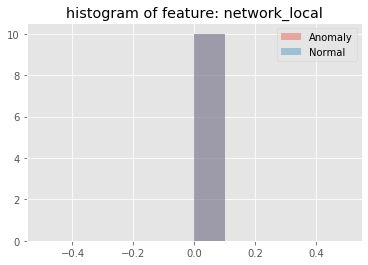

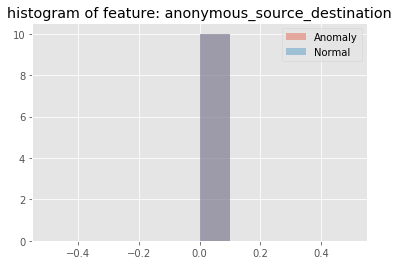

In [9]:
import seaborn as sns 
import matplotlib.gridspec as gridspec
dataset = combined_data
# plt.figure(figsize=(12,28*5))
# gs = gridspec.GridSpec(28, 1)
for feature in columns_data:
    ax = plt.subplot()
    sns.distplot(dataset[feature][dataset.state == 1], bins=10, label='Anomaly')
    sns.distplot(dataset[feature][dataset.state == 0], bins=10, label='Normal')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(feature))
    plt.legend(loc='best')
    plt.show()